# WeatherPy
----

#### Observations
* Of all the metrics observed, latitude is the best predictor of a cities maximum temperature. 
* For this sample, there is a much stronger corrleation for latitude and humidity/cloudiness for the southern hemisphere than the northern hemisphere.  
* The vast majority of cities have wind speeds under 20mp

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 

# Import API key
from apikey import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create lists for data frame

city_name_list = []
humidity_list = []
latitude_list = []
longitude_list = []
cloudiness_list = []
temperature_list = []
wind_speed_list = []
country_list = []
date_list = []


In [4]:
#Setup urls
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"   

record_counter = 0 
set_counter = 0

for city in cities:
    query_url = f"{base_url}{city}&appid={api_key}&units={units}"
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
        time.sleep(60)
    
    print(f"Processing record {record_counter} of set {set_counter} | {city}. This record is {cities.index(city)} out of {len(cities)} tested.")
    
    try:
        response = requests.get(query_url).json()
        city_name_list.append(response['name'])
        latitude_list.append(response["coord"]["lat"])
        longitude_list.append(response["coord"]["lon"])
        cloudiness_list.append(response["clouds"]["all"])
        humidity_list.append(response["main"]["humidity"])
        temperature_list.append(response["main"]["temp_max"])
        country_list.append(response["sys"]["country"])
        wind_speed_list.append(response["wind"]["speed"])
        date_list.append(response["dt"])
    except: 
        print(f"Record for {city} Not Found!....continuing search")
        pass
   
    

Processing record 1 of set 0 | puerto ayora. This record is 0 out of 643 tested.
Processing record 2 of set 0 | vanse. This record is 1 out of 643 tested.
Processing record 3 of set 0 | vaini. This record is 2 out of 643 tested.
Processing record 4 of set 0 | rikitea. This record is 3 out of 643 tested.
Processing record 5 of set 0 | airai. This record is 4 out of 643 tested.
Processing record 6 of set 0 | yaan. This record is 5 out of 643 tested.
Processing record 7 of set 0 | east london. This record is 6 out of 643 tested.
Processing record 8 of set 0 | penaflor. This record is 7 out of 643 tested.
Processing record 9 of set 0 | samarai. This record is 8 out of 643 tested.
Processing record 10 of set 0 | la ronge. This record is 9 out of 643 tested.
Processing record 11 of set 0 | laguna. This record is 10 out of 643 tested.
Processing record 12 of set 0 | korla. This record is 11 out of 643 tested.
Processing record 13 of set 0 | atuona. This record is 12 out of 643 tested.
Process

Processing record 50 of set 1 | srednekolymsk. This record is 100 out of 643 tested.
Processing record 0 of set 2 | luanda. This record is 101 out of 643 tested.
Processing record 1 of set 2 | harlingen. This record is 102 out of 643 tested.
Processing record 2 of set 2 | rocha. This record is 103 out of 643 tested.
Processing record 3 of set 2 | hundorp. This record is 104 out of 643 tested.
Processing record 4 of set 2 | faya. This record is 105 out of 643 tested.
Processing record 5 of set 2 | new norfolk. This record is 106 out of 643 tested.
Processing record 6 of set 2 | hermanus. This record is 107 out of 643 tested.
Processing record 7 of set 2 | bourail. This record is 108 out of 643 tested.
Processing record 8 of set 2 | hattiesburg. This record is 109 out of 643 tested.
Processing record 9 of set 2 | krutinka. This record is 110 out of 643 tested.
Processing record 10 of set 2 | obala. This record is 111 out of 643 tested.
Processing record 11 of set 2 | moerai. This record 

Processing record 46 of set 3 | urdzhar. This record is 198 out of 643 tested.
Record for urdzhar Not Found!....continuing search
Processing record 47 of set 3 | tangua. This record is 199 out of 643 tested.
Processing record 48 of set 3 | mahebourg. This record is 200 out of 643 tested.
Processing record 49 of set 3 | narsaq. This record is 201 out of 643 tested.
Processing record 50 of set 3 | bay roberts. This record is 202 out of 643 tested.
Processing record 0 of set 4 | staryy nadym. This record is 203 out of 643 tested.
Processing record 1 of set 4 | chokwe. This record is 204 out of 643 tested.
Processing record 2 of set 4 | kawalu. This record is 205 out of 643 tested.
Processing record 3 of set 4 | pangnirtung. This record is 206 out of 643 tested.
Processing record 4 of set 4 | honningsvag. This record is 207 out of 643 tested.
Processing record 5 of set 4 | kazerun. This record is 208 out of 643 tested.
Processing record 6 of set 4 | torbay. This record is 209 out of 643 te

Processing record 39 of set 5 | port macquarie. This record is 293 out of 643 tested.
Processing record 40 of set 5 | shetpe. This record is 294 out of 643 tested.
Processing record 41 of set 5 | barkhan. This record is 295 out of 643 tested.
Processing record 42 of set 5 | acapulco. This record is 296 out of 643 tested.
Processing record 43 of set 5 | kumluca. This record is 297 out of 643 tested.
Processing record 44 of set 5 | palana. This record is 298 out of 643 tested.
Processing record 45 of set 5 | freeport. This record is 299 out of 643 tested.
Processing record 46 of set 5 | samusu. This record is 300 out of 643 tested.
Record for samusu Not Found!....continuing search
Processing record 47 of set 5 | nanchang. This record is 301 out of 643 tested.
Processing record 48 of set 5 | tamiahua. This record is 302 out of 643 tested.
Processing record 49 of set 5 | fortuna. This record is 303 out of 643 tested.
Processing record 50 of set 5 | shellbrook. This record is 304 out of 643

Processing record 41 of set 7 | ponnani. This record is 397 out of 643 tested.
Processing record 42 of set 7 | padang. This record is 398 out of 643 tested.
Processing record 43 of set 7 | tasiilaq. This record is 399 out of 643 tested.
Processing record 44 of set 7 | kruisfontein. This record is 400 out of 643 tested.
Processing record 45 of set 7 | abnub. This record is 401 out of 643 tested.
Processing record 46 of set 7 | beyneu. This record is 402 out of 643 tested.
Processing record 47 of set 7 | molnlycke. This record is 403 out of 643 tested.
Processing record 48 of set 7 | aflu. This record is 404 out of 643 tested.
Record for aflu Not Found!....continuing search
Processing record 49 of set 7 | bowen. This record is 405 out of 643 tested.
Processing record 50 of set 7 | mount isa. This record is 406 out of 643 tested.
Processing record 0 of set 8 | rafaela. This record is 407 out of 643 tested.
Processing record 1 of set 8 | florianopolis. This record is 408 out of 643 tested.

Processing record 37 of set 9 | flinders. This record is 495 out of 643 tested.
Processing record 38 of set 9 | eyl. This record is 496 out of 643 tested.
Processing record 39 of set 9 | tucuman. This record is 497 out of 643 tested.
Processing record 40 of set 9 | along. This record is 498 out of 643 tested.
Processing record 41 of set 9 | cidreira. This record is 499 out of 643 tested.
Processing record 42 of set 9 | gushikawa. This record is 500 out of 643 tested.
Processing record 43 of set 9 | iquitos. This record is 501 out of 643 tested.
Processing record 44 of set 9 | katsuura. This record is 502 out of 643 tested.
Processing record 45 of set 9 | yithion. This record is 503 out of 643 tested.
Record for yithion Not Found!....continuing search
Processing record 46 of set 9 | pasighat. This record is 504 out of 643 tested.
Processing record 47 of set 9 | wicklow. This record is 505 out of 643 tested.
Processing record 48 of set 9 | san vicente. This record is 506 out of 643 teste

Processing record 31 of set 11 | covington. This record is 591 out of 643 tested.
Processing record 32 of set 11 | tarko-sale. This record is 592 out of 643 tested.
Processing record 33 of set 11 | ojinaga. This record is 593 out of 643 tested.
Processing record 34 of set 11 | sao felix do xingu. This record is 594 out of 643 tested.
Processing record 35 of set 11 | quebec. This record is 595 out of 643 tested.
Processing record 36 of set 11 | bada. This record is 596 out of 643 tested.
Processing record 37 of set 11 | luderitz. This record is 597 out of 643 tested.
Processing record 38 of set 11 | dafeng. This record is 598 out of 643 tested.
Processing record 39 of set 11 | rostovka. This record is 599 out of 643 tested.
Processing record 40 of set 11 | yamethin. This record is 600 out of 643 tested.
Processing record 41 of set 11 | chapais. This record is 601 out of 643 tested.
Processing record 42 of set 11 | sozopol. This record is 602 out of 643 tested.
Processing record 43 of se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
Weather_df = pd.DataFrame({"City" : city_name_list,
                            "Latitude" : latitude_list,
                            "Longitude" : longitude_list,
                            "Humidity" : humidity_list,
                            "Cloudiness" : cloudiness_list,
                            "Temperature" : temperature_list,
                            "Country": country_list,
                            "Wind_Speed" : wind_speed_list,
                            "Date" : date_list})

Weather_df.describe()

,Latitude,Longitude,Humidity,Cloudiness,Temperature,Wind_Speed,Date
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,21.086768,21.652222,74.198653,50.008418,50.333670,7.816582,1.607400e+09
std,33.703412,90.440415,19.562352,39.230519,28.115657,5.248633,2.691256e+02
min,-54.800000,-179.170000,1.000000,0.000000,-30.690000,0.110000,1.607399e+09
25%,-8.137500,-57.190000,65.000000,5.000000,28.990000,3.970000,1.607400e+09
50%,27.830000,27.880000,78.000000,50.000000,59.000000,6.680000,1.607400e+09
75%,50.020000,102.277500,89.000000,90.000000,73.765000,10.777500,1.607400e+09
max,78.220000,179.320000,100.000000,100.000000,96.800000,35.790000,1.607400e+09


In [6]:
Weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
remove_hum = Weather_df.loc[Weather_df.Humidity < 101]
remove_hum.describe()

,Latitude,Longitude,Humidity,Cloudiness,Temperature,Wind_Speed,Date
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,21.086768,21.652222,74.198653,50.008418,50.333670,7.816582,1.607400e+09
std,33.703412,90.440415,19.562352,39.230519,28.115657,5.248633,2.691256e+02
min,-54.800000,-179.170000,1.000000,0.000000,-30.690000,0.110000,1.607399e+09
25%,-8.137500,-57.190000,65.000000,5.000000,28.990000,3.970000,1.607400e+09
50%,27.830000,27.880000,78.000000,50.000000,59.000000,6.680000,1.607400e+09
75%,50.020000,102.277500,89.000000,90.000000,73.765000,10.777500,1.607400e+09
max,78.220000,179.320000,100.000000,100.000000,96.800000,35.790000,1.607400e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
over_hundred = Weather_df.loc[Weather_df.Humidity > 100].index
over_hundred

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Weather_df.drop(Weather_df.index[over_hundred], inplace = False)
clean_city_data.head()

,City,Latitude,Longitude,Humidity,Cloudiness,Temperature,Country,Wind_Speed,Date
0,Puerto Ayora,-0.74,-90.35,91,65,73.99,EC,8.99,1607399328
1,Vanse,58.12,6.70,90,100,45.00,NO,19.91,1607399509
2,Vaini,-21.20,-175.20,78,20,82.40,TO,12.75,1607399509
3,Rikitea,-23.12,-134.97,80,3,75.99,PF,13.09,1607399350
4,Airai,-8.93,125.41,75,100,74.53,TL,3.67,1607399365


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
import datetime as dt

current_date = dt.datetime.today().strftime("%m/%d/%Y")


## Latitude vs. Temperature Plot

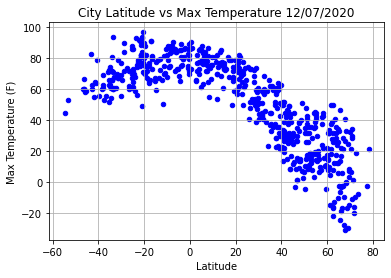

In [11]:
clean_city_data.plot(kind='scatter', x='Latitude', y='Temperature',color = 'blue' )
title = f"City Latitude vs Max Temperature {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("output_data/lat_temp.png")

There is a strong negative linear relationship between city latitude and humidity. As a city latitude increases the max temperature decreases. 

## Latitude vs. Humidity Plot

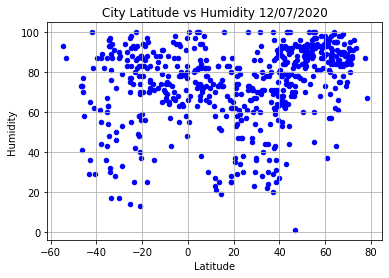

In [12]:
clean_city_data.plot(kind='scatter', x='Latitude', y='Humidity',color = 'blue' )
title = f"City Latitude vs Humidity {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("output_data/lat_humid.png")

Humidity and latitude do not seem to be correlated. 

## Latitude vs. Cloudiness Plot

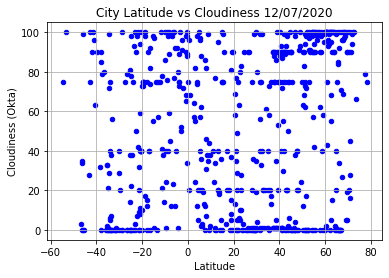

In [13]:
clean_city_data.plot(kind='scatter', x='Latitude', y='Cloudiness',color = 'blue' )
title = f"City Latitude vs Cloudiness {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (Okta)')
plt.grid()
plt.savefig("output_data/lat_cloud.png")

Cloudiness and latitude do not seem to be correlated. 

## Latitude vs. Wind Speed Plot

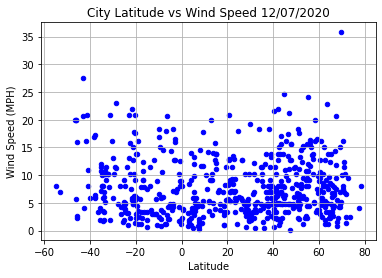

In [14]:
clean_city_data.plot(kind='scatter', x='Latitude', y='Wind_Speed',color = 'blue' )
title = f"City Latitude vs Wind Speed {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid()
plt.savefig("output_data/lat_windspeed.png")

The distribution of wind speed is similar across all latitudes. Wind speed is likely influenced by something other than latitude.

## Linear Regression

In [15]:
# Northern Hemisphere
northern = clean_city_data.loc[clean_city_data.Latitude >= 0]
northern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 1 to 593
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         412 non-null    object 
 1   Latitude     412 non-null    float64
 2   Longitude    412 non-null    float64
 3   Humidity     412 non-null    int64  
 4   Cloudiness   412 non-null    int64  
 5   Temperature  412 non-null    float64
 6   Country      412 non-null    object 
 7   Wind_Speed   412 non-null    float64
 8   Date         412 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 32.2+ KB


In [16]:
southern = clean_city_data.loc[clean_city_data.Latitude < 0]
southern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 591
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         182 non-null    object 
 1   Latitude     182 non-null    float64
 2   Longitude    182 non-null    float64
 3   Humidity     182 non-null    int64  
 4   Cloudiness   182 non-null    int64  
 5   Temperature  182 non-null    float64
 6   Country      182 non-null    object 
 7   Wind_Speed   182 non-null    float64
 8   Date         182 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.2+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

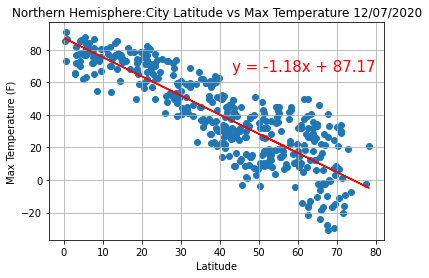

In [17]:
x_values = northern.Latitude
y_values = northern.Temperature
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(43,67),fontsize=15,color="red")
title = f"Northern Hemisphere:City Latitude vs Max Temperature {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("output_data/northern_lat_temp.png")

For the northern hemisphere, there is a strong negative linear relationship between max temperature and city latitude. As city latitude increases, max temperature steeply declines.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

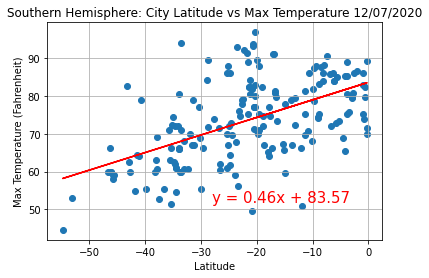

In [18]:
x_values = southern.Latitude
y_values = southern.Temperature
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-28, 52),fontsize=15,color="red")
title = f"Southern Hemisphere: City Latitude vs Max Temperature {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.grid()
plt.savefig("output_data/southern_lat_temp.png")

The southern hemisphere operates similiarly to the northern hemisphere, but not to the same degree. As latitude moves further from 0, max temperature decreases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

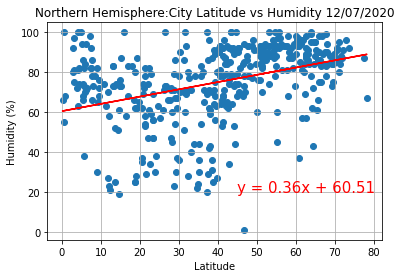

In [19]:
x_values = northern.Latitude
y_values = northern.Humidity
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
title = f"Northern Hemisphere:City Latitude vs Humidity {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("output_data/northern_lat_humidity.png")

There is a slight positive linear relationship between humidity and latitude for the northern hemisphere. By it self, latitude is not a great predictor of a city humidity.                                 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

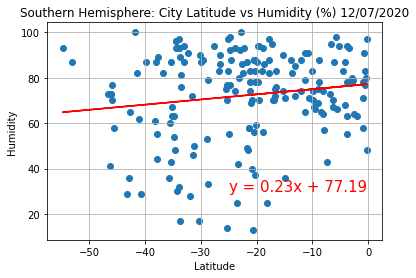

In [20]:
x_values = southern.Latitude
y_values = southern.Humidity
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
title = f"Southern Hemisphere: City Latitude vs Humidity (%) {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("output_data/southern_lat_humid.png")

Surprisingly, for the southern hemisphere, latitude has a much stronger linear correlation with humidity. As a cities latitude approches 0, the humidity levels rise considerably. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

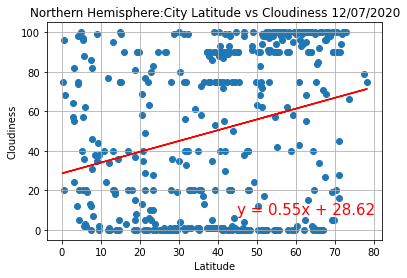

In [21]:
x_values = northern.Latitude
y_values = northern.Cloudiness
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,8),fontsize=15,color="red")
title = f"Northern Hemisphere:City Latitude vs Cloudiness {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("output_data/northern_lat_clouds.png")

The northern hemisphere has a small postive correlation between cloudiness and latitude. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

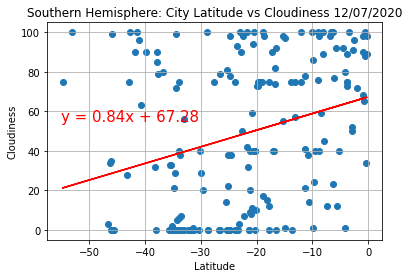

In [22]:
x_values = southern.Latitude
y_values = southern.Cloudiness
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
title = f"Southern Hemisphere: City Latitude vs Cloudiness {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("output_data/southern_lat_cloudiness.png")

For the southern hemisphere, cloudiness and have much stronger corrletation than they do in the northern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

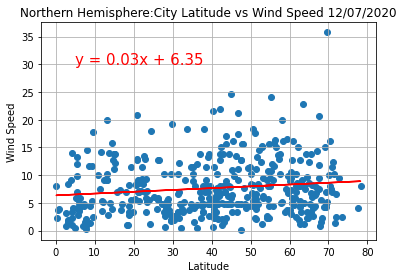

In [23]:
x_values = northern.Latitude
y_values = northern.Wind_Speed
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
title = f"Northern Hemisphere:City Latitude vs Wind Speed {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("output_data/northern_lat_wind.png")

In this visiualization,we can more clearly see that wind speed has almost no correlation with a cities latitidue in the northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

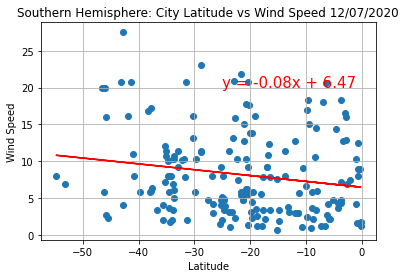

In [24]:
x_values = southern.Latitude
y_values = southern.Wind_Speed
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
title = f"Southern Hemisphere: City Latitude vs Wind Speed {current_date}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("output_data/southern_lat_wind.png")

While the southern hempishpere has a higher correlation between latitude and windspeed than the northern hemisphere, windspeed latitude is still not a viable predictor for windspeed. 